In [342]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split

In [343]:
arr=os.listdir("C:/Users/subscriber/OneDrive/Desktop/img recog/ARR/")
ob=os.listdir("C:/Users/subscriber/OneDrive/Desktop/img recog/obama/")
ce=os.listdir("C:/Users/subscriber/OneDrive/Desktop/img recog/evans/")

In [344]:
limit=10
arr_images = [None]*limit
ob_images = [None]*limit
ce_images = [None]*limit

j=0
for i in arr:
    if (j<limit):
        arr_images[j]= imread("C:/Users/subscriber/OneDrive/Desktop/img recog/ARR/"+i)
        j+=1
    else:
        break

j=0
for i in ob:
    if(j<limit):
        ob_images[j]=imread("C:/Users/subscriber/OneDrive/Desktop/img recog/obama/"+i)
        j+=1
    else:
        break

j=0
for i in ce:
    if(j<limit):
        ce_images[j]=imread("C:/Users/subscriber/OneDrive/Desktop/img recog/evans/"+i)
        j+=1
    else:
        break

In [345]:
arr_gray=[None]*limit
ob_gray=[None]*limit
ce_gray=[None]*limit
j=0

for i in arr:
    if(j<limit):
        arr_gray[j]=rgb2gray(arr_images[j])
        j+=1
    else:
        break
j=0
for i in ob:
    if(j<limit):
        ob_gray[j]=rgb2gray(ob_images[j])
        j+=1
    else:
        break
j=0
for i in ce:
    if(j<limit):
        ce_gray[j]=rgb2gray(ce_images[j])
        j+=1
    else:
        break

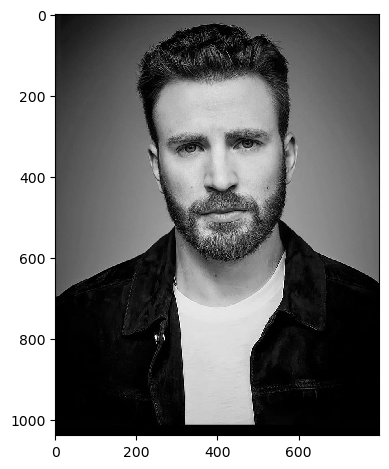

In [346]:
imshow(ce_gray[0])

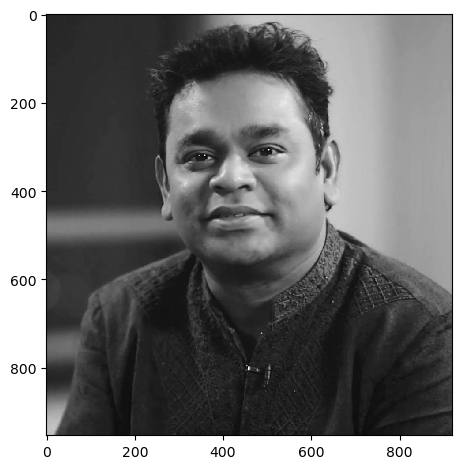

In [347]:
imshow(arr_gray[0])

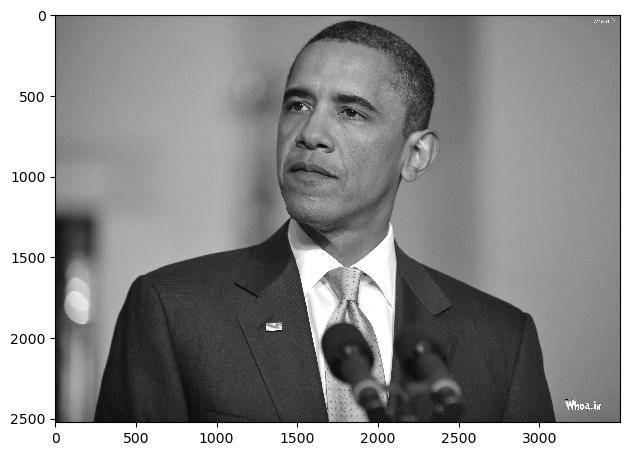

In [348]:
imshow(ob_gray[0])

In [349]:
ce_gray[2].shape

(1500, 1000)

In [350]:
for j in range(10):
    ce_temp=ce_gray[j]
    ce_gray[j]=resize(ce_temp,(512,512))

In [351]:
for j in range(10):
    arr_temp=arr_gray[j]
    arr_gray[j]=resize(arr_temp,(512,512))
for j in range(10):
    ob_temp=ob_gray[j]
    ob_gray[j]=resize(ob_temp,(512,512))



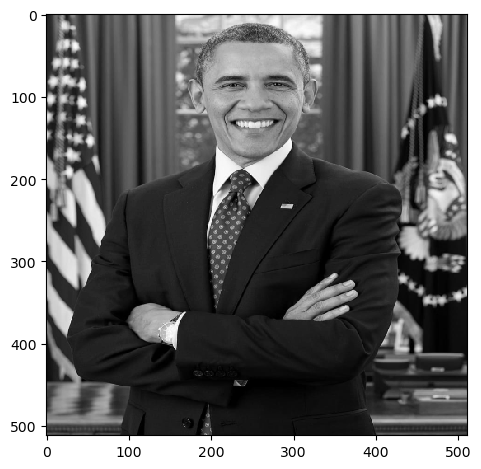

In [352]:
imshow(ob_gray[2])

In [353]:
len_of_ce=len(ce_gray)
len_of_ob=len(ob_gray)
len_of_arr=len(arr_gray)

In [354]:
image_size_ce=ce_gray[1].shape
image_size_arr=arr_gray[1].shape
image_size_ob=ob_gray[1].shape

In [355]:
image_size_ce

(512, 512)

In [356]:
flatten_size_ce=image_size_ce[0]*image_size_ce[1]
flatten_size_arr=image_size_arr[0]*image_size_arr[1]
flatten_size_ob=image_size_ob[0]*image_size_ob[1]

In [357]:
flatten_size_ce

262144

In [358]:
for i in range(len_of_ce):
    ce_gray[i]= np.ndarray.flatten(ce_gray[i].reshape(flatten_size_ce,1))
for i in range(len_of_arr):
    arr_gray[i]= np.ndarray.flatten(arr_gray[i].reshape(flatten_size_arr,1))
for i in range(len_of_ob):
    ob_gray[i]= np.ndarray.flatten(ob_gray[i].reshape(flatten_size_ob,1))

In [359]:
ce_gray=np.dstack(ce_gray)
arr_gray=np.dstack(arr_gray)
ob_gray=np.dstack(ob_gray)

In [360]:
ce_gray.shape

(1, 262144, 10)

In [361]:
ce_gray=np.rollaxis(ce_gray,axis=2,start=0)
arr_gray=np.rollaxis(arr_gray,axis=2,start=0)
ob_gray=np.rollaxis(ob_gray,axis=1,start=0)
ob_gray.shape



(262144, 1, 10)

In [362]:
arr_gray=np.rollaxis(arr_gray,axis=2,start=1)
ce_gray=np.rollaxis(ce_gray,axis=2,start=1)

In [363]:
arr_gray.shape

(10, 262144, 1)

In [364]:
ce_gray=ce_gray.reshape(len_of_ce,flatten_size_ce)
arr_gray=arr_gray.reshape(len_of_arr,flatten_size_arr)
ob_gray=ob_gray.reshape(len_of_ob,flatten_size_ob)

In [365]:
arr_gray.shape

(10, 262144)

In [366]:
ce_data=pd.DataFrame(ce_gray)
ob_data=pd.DataFrame(ob_gray)
arr_data=pd.DataFrame(arr_gray)

In [367]:
arr_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.147060,0.144716,0.145025,0.147032,0.148637,0.150507,0.150557,0.150557,0.150494,0.148576,...,0.161306,0.134612,0.125931,0.155349,0.178336,0.183805,0.178491,0.162045,0.173603,0.180284
1,0.304958,0.322574,0.319749,0.322587,0.328379,0.329888,0.337511,0.335705,0.336487,0.334490,...,0.573018,0.400853,0.411477,0.546587,0.676518,0.559298,0.379586,0.334682,0.407700,0.695391
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.579360,0.579360,0.579360,0.578975,0.578337,0.576767,0.574737,0.575231,0.576623,0.581285,...,0.946166,0.946230,0.951337,0.954284,0.951159,0.949804,0.952040,0.955435,0.960581,0.960931
4,0.171286,0.168192,0.167126,0.169440,0.175009,0.180378,0.181419,0.178038,0.176164,0.182638,...,0.064387,0.069358,0.070412,0.072812,0.074206,0.076034,0.077567,0.078245,0.081132,0.081132
5,0.749157,0.756633,0.767984,0.775873,0.780025,0.783854,0.791008,0.795435,0.796161,0.802267,...,0.267242,0.268059,0.271200,0.270005,0.262851,0.261085,0.275075,0.275075,0.275075,0.275075
6,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,...,0.854249,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268
7,0.484300,0.495767,0.501767,0.511386,0.526232,0.531270,0.544230,0.556481,0.565000,0.581619,...,0.627922,0.624714,0.616072,0.617083,0.611602,0.616000,0.617342,0.622843,0.619844,0.611296
8,0.864237,0.901660,0.890959,0.886019,0.885940,0.894658,0.893032,0.892168,0.892073,0.895328,...,0.066443,0.066444,0.066444,0.066444,0.066448,0.069082,0.069618,0.069300,0.066711,0.065164
9,0.928187,0.943893,0.938568,0.927298,0.942674,0.950389,0.929399,0.943480,0.927830,0.947510,...,0.670749,0.673288,0.688673,0.684731,0.669827,0.673991,0.657696,0.654462,0.664447,0.671487


In [368]:
ce_data["label"]="CHRIS EVANS"
arr_data["label"]="AR RAHMAN"
ob_data["label"]="BARACK OBAMA"


In [369]:
ob_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.446280,0.337953,0.171021,0.757576,0.178614,0.022644,0.794588,0.106830,0.239310,0.710718,...,0.030752,0.801829,0.064893,0.196972,0.024740,0.621448,0.263751,0.409266,0.718926,BARACK OBAMA
1,0.394883,0.037149,0.798711,0.072446,0.195437,0.027025,0.626425,0.257371,0.411332,0.718926,...,0.724430,0.472475,0.274526,0.703928,0.697537,0.537980,0.517551,0.199497,0.215378,BARACK OBAMA
2,0.602961,0.728987,0.473759,0.274348,0.726757,0.693748,0.504465,0.533724,0.256423,0.169044,...,0.322396,0.642405,0.270273,0.609331,0.433855,0.557090,0.587045,0.489120,0.266215,BARACK OBAMA
3,0.345468,0.289783,0.641100,0.214518,0.612157,0.411987,0.557202,0.577152,0.476023,0.260936,...,0.136480,0.249819,0.292438,0.635523,0.158957,0.312113,0.641450,0.180840,0.413116,BARACK OBAMA
4,0.438675,0.150316,0.241214,0.200530,0.634515,0.158773,0.330877,0.691920,0.187465,0.402894,...,0.152100,0.258207,0.568262,0.108725,0.272046,0.860492,0.079367,0.266326,0.789321,BARACK OBAMA
5,0.169524,0.369667,0.768845,0.799575,0.269242,0.209524,0.825227,0.132989,0.236475,0.549325,...,0.458057,0.846052,0.085325,0.237628,0.395168,0.708226,0.309452,0.051713,0.743760,BARACK OBAMA
6,0.251816,0.457140,0.843286,0.087052,0.237628,0.396517,0.704424,0.304862,0.144524,0.742081,...,0.120505,0.244205,0.172505,0.024632,0.695957,0.735690,0.177850,0.866205,0.060573,BARACK OBAMA
7,0.031842,0.112945,0.248744,0.170970,0.108766,0.695152,0.746803,0.177642,0.835653,0.060837,...,0.155911,0.788346,0.159401,0.002690,0.096925,0.045603,0.808855,0.221554,0.115062,BARACK OBAMA
8,0.107319,0.101425,0.781143,0.160288,0.002951,0.095290,0.048033,0.825698,0.155968,0.110627,...,0.049723,0.202386,0.090137,0.165633,0.180474,0.052591,0.998532,0.358783,0.362388,BARACK OBAMA
9,0.014531,0.049455,0.238624,0.100706,0.173496,0.148354,0.085435,0.999168,0.357597,0.384615,...,0.216726,0.221148,0.555093,0.204548,0.279995,0.461648,0.058325,0.951644,0.072300,BARACK OBAMA


In [370]:
img_1=pd.concat([ce_data,arr_data])


In [371]:
img=pd.concat([img_1,ob_data])

In [372]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.084644,0.092181,0.091568,0.089388,0.096433,0.091997,0.100677,0.106426,0.097240,0.081084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CHRIS EVANS
1,0.858055,0.856577,0.867250,0.877070,0.886227,0.895133,0.896752,0.896949,0.890794,0.876362,...,0.998672,0.993066,0.968726,0.934492,0.891672,0.836937,0.766951,0.663448,0.550209,CHRIS EVANS
2,0.089385,0.088900,0.082786,0.073078,0.079920,0.076843,0.075497,0.079206,0.078776,0.081093,...,0.017636,0.017636,0.017636,0.017636,0.017384,0.013846,0.013727,0.013727,0.013727,CHRIS EVANS
3,0.736432,0.732680,0.735994,0.738752,0.738250,0.737397,0.737027,0.739743,0.739616,0.735433,...,0.139026,0.138181,0.139331,0.142312,0.144035,0.142270,0.135984,0.128081,0.130376,CHRIS EVANS
4,0.631252,0.634328,0.638563,0.634774,0.631611,0.646311,0.652514,0.658699,0.642245,0.649887,...,0.820979,0.844812,0.857347,0.854007,0.844654,0.828219,0.807897,0.799491,0.799483,CHRIS EVANS
5,0.281957,0.281638,0.284049,0.280040,0.283637,0.285926,0.281447,0.281724,0.284837,0.280366,...,0.000022,0.000213,0.001160,0.001421,0.000926,0.001242,0.004122,0.002898,0.000576,CHRIS EVANS
6,0.626007,0.627256,0.633481,0.631521,0.631095,0.632062,0.634278,0.638496,0.631782,0.632114,...,0.513187,0.516900,0.520932,0.529027,0.560455,0.571556,0.572859,0.575607,0.579057,CHRIS EVANS
7,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,...,0.907862,0.911141,0.911784,0.912168,0.912349,0.912349,0.912349,0.912349,0.912349,CHRIS EVANS
8,0.402815,0.407800,0.414241,0.417857,0.418193,0.417465,0.413780,0.409137,0.407650,0.407513,...,0.009894,0.007843,0.007843,0.007843,0.007843,0.009950,0.009922,0.007843,0.007843,CHRIS EVANS
9,0.903802,0.906692,0.908932,0.911792,0.913735,0.914829,0.917737,0.920745,0.926424,0.932517,...,0.167751,0.190716,0.194044,0.169711,0.153776,0.186058,0.239729,0.313982,0.347114,CHRIS EVANS


In [373]:
from sklearn.utils import shuffle

In [374]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.084644,0.092181,0.091568,0.089388,0.096433,0.091997,0.100677,0.106426,0.097240,0.081084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CHRIS EVANS
1,0.858055,0.856577,0.867250,0.877070,0.886227,0.895133,0.896752,0.896949,0.890794,0.876362,...,0.998672,0.993066,0.968726,0.934492,0.891672,0.836937,0.766951,0.663448,0.550209,CHRIS EVANS
2,0.089385,0.088900,0.082786,0.073078,0.079920,0.076843,0.075497,0.079206,0.078776,0.081093,...,0.017636,0.017636,0.017636,0.017636,0.017384,0.013846,0.013727,0.013727,0.013727,CHRIS EVANS
3,0.736432,0.732680,0.735994,0.738752,0.738250,0.737397,0.737027,0.739743,0.739616,0.735433,...,0.139026,0.138181,0.139331,0.142312,0.144035,0.142270,0.135984,0.128081,0.130376,CHRIS EVANS
4,0.631252,0.634328,0.638563,0.634774,0.631611,0.646311,0.652514,0.658699,0.642245,0.649887,...,0.820979,0.844812,0.857347,0.854007,0.844654,0.828219,0.807897,0.799491,0.799483,CHRIS EVANS
5,0.281957,0.281638,0.284049,0.280040,0.283637,0.285926,0.281447,0.281724,0.284837,0.280366,...,0.000022,0.000213,0.001160,0.001421,0.000926,0.001242,0.004122,0.002898,0.000576,CHRIS EVANS
6,0.626007,0.627256,0.633481,0.631521,0.631095,0.632062,0.634278,0.638496,0.631782,0.632114,...,0.513187,0.516900,0.520932,0.529027,0.560455,0.571556,0.572859,0.575607,0.579057,CHRIS EVANS
7,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,0.950992,...,0.907862,0.911141,0.911784,0.912168,0.912349,0.912349,0.912349,0.912349,0.912349,CHRIS EVANS
8,0.402815,0.407800,0.414241,0.417857,0.418193,0.417465,0.413780,0.409137,0.407650,0.407513,...,0.009894,0.007843,0.007843,0.007843,0.007843,0.009950,0.009922,0.007843,0.007843,CHRIS EVANS
9,0.903802,0.906692,0.908932,0.911792,0.913735,0.914829,0.917737,0.920745,0.926424,0.932517,...,0.167751,0.190716,0.194044,0.169711,0.153776,0.186058,0.239729,0.313982,0.347114,CHRIS EVANS


In [375]:
from sklearn.utils import shuffle

In [376]:
img_shuffle = shuffle(img).reset_index()

In [377]:
img_shuffle

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,4,0.631252,0.634328,0.638563,0.634774,0.631611,0.646311,0.652514,0.658699,0.642245,...,0.820979,0.844812,0.857347,0.854007,0.844654,0.828219,0.807897,0.799491,0.799483,CHRIS EVANS
1,3,0.579360,0.579360,0.579360,0.578975,0.578337,0.576767,0.574737,0.575231,0.576623,...,0.946230,0.951337,0.954284,0.951159,0.949804,0.952040,0.955435,0.960581,0.960931,AR RAHMAN
2,5,0.169524,0.369667,0.768845,0.799575,0.269242,0.209524,0.825227,0.132989,0.236475,...,0.458057,0.846052,0.085325,0.237628,0.395168,0.708226,0.309452,0.051713,0.743760,BARACK OBAMA
3,0,0.147060,0.144716,0.145025,0.147032,0.148637,0.150507,0.150557,0.150557,0.150494,...,0.134612,0.125931,0.155349,0.178336,0.183805,0.178491,0.162045,0.173603,0.180284,AR RAHMAN
4,2,0.089385,0.088900,0.082786,0.073078,0.079920,0.076843,0.075497,0.079206,0.078776,...,0.017636,0.017636,0.017636,0.017636,0.017384,0.013846,0.013727,0.013727,0.013727,CHRIS EVANS
5,1,0.394883,0.037149,0.798711,0.072446,0.195437,0.027025,0.626425,0.257371,0.411332,...,0.724430,0.472475,0.274526,0.703928,0.697537,0.537980,0.517551,0.199497,0.215378,BARACK OBAMA
6,4,0.438675,0.150316,0.241214,0.200530,0.634515,0.158773,0.330877,0.691920,0.187465,...,0.152100,0.258207,0.568262,0.108725,0.272046,0.860492,0.079367,0.266326,0.789321,BARACK OBAMA
7,6,0.626007,0.627256,0.633481,0.631521,0.631095,0.632062,0.634278,0.638496,0.631782,...,0.513187,0.516900,0.520932,0.529027,0.560455,0.571556,0.572859,0.575607,0.579057,CHRIS EVANS
8,9,0.014531,0.049455,0.238624,0.100706,0.173496,0.148354,0.085435,0.999168,0.357597,...,0.216726,0.221148,0.555093,0.204548,0.279995,0.461648,0.058325,0.951644,0.072300,BARACK OBAMA
9,6,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,...,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,AR RAHMAN


In [378]:
img_shuffle=img_shuffle.drop(['index'],axis=1)

In [379]:
img_shuffle

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.631252,0.634328,0.638563,0.634774,0.631611,0.646311,0.652514,0.658699,0.642245,0.649887,...,0.820979,0.844812,0.857347,0.854007,0.844654,0.828219,0.807897,0.799491,0.799483,CHRIS EVANS
1,0.579360,0.579360,0.579360,0.578975,0.578337,0.576767,0.574737,0.575231,0.576623,0.581285,...,0.946230,0.951337,0.954284,0.951159,0.949804,0.952040,0.955435,0.960581,0.960931,AR RAHMAN
2,0.169524,0.369667,0.768845,0.799575,0.269242,0.209524,0.825227,0.132989,0.236475,0.549325,...,0.458057,0.846052,0.085325,0.237628,0.395168,0.708226,0.309452,0.051713,0.743760,BARACK OBAMA
3,0.147060,0.144716,0.145025,0.147032,0.148637,0.150507,0.150557,0.150557,0.150494,0.148576,...,0.134612,0.125931,0.155349,0.178336,0.183805,0.178491,0.162045,0.173603,0.180284,AR RAHMAN
4,0.089385,0.088900,0.082786,0.073078,0.079920,0.076843,0.075497,0.079206,0.078776,0.081093,...,0.017636,0.017636,0.017636,0.017636,0.017384,0.013846,0.013727,0.013727,0.013727,CHRIS EVANS
5,0.394883,0.037149,0.798711,0.072446,0.195437,0.027025,0.626425,0.257371,0.411332,0.718926,...,0.724430,0.472475,0.274526,0.703928,0.697537,0.537980,0.517551,0.199497,0.215378,BARACK OBAMA
6,0.438675,0.150316,0.241214,0.200530,0.634515,0.158773,0.330877,0.691920,0.187465,0.402894,...,0.152100,0.258207,0.568262,0.108725,0.272046,0.860492,0.079367,0.266326,0.789321,BARACK OBAMA
7,0.626007,0.627256,0.633481,0.631521,0.631095,0.632062,0.634278,0.638496,0.631782,0.632114,...,0.513187,0.516900,0.520932,0.529027,0.560455,0.571556,0.572859,0.575607,0.579057,CHRIS EVANS
8,0.014531,0.049455,0.238624,0.100706,0.173496,0.148354,0.085435,0.999168,0.357597,0.384615,...,0.216726,0.221148,0.555093,0.204548,0.279995,0.461648,0.058325,0.951644,0.072300,BARACK OBAMA
9,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,0.875886,...,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,0.854268,AR RAHMAN


In [380]:
img_shuffle.shape

(30, 262145)

In [381]:
x = img_shuffle.values[:,:-1]

In [382]:
y= img_shuffle.values[:,-1]

In [383]:
x

array([[0.6312519361276682, 0.6343275368611994, 0.6385629591441391, ...,
        0.8078973676566683, 0.7994905914248491, 0.7994828052157885],
       [0.5793596323529412, 0.5793596323529412, 0.5793596323529411, ...,
        0.9554352695981195, 0.9605810494733324, 0.9609305741441017],
       [0.1695235933873829, 0.36966734375, 0.7688447424360962, ...,
        0.3094519832237094, 0.05171345549552474, 0.7437604183227853],
       ...,
       [0.4028151523246018, 0.4077996900850184, 0.41424051470588236, ...,
        0.009922461416207107, 0.00784313725490196, 0.00784313725490196],
       [0.345468433806071, 0.2897827249399036, 0.6411000682153442, ...,
        0.641450381335691, 0.18083997326255502, 0.4131159635895374],
       [0.30495805159280953, 0.322574473161437, 0.3197493368144586, ...,
        0.3346824982140664, 0.4077004484168726, 0.695390720885416]],
      dtype=object)

In [384]:
y

array(['CHRIS EVANS', 'AR RAHMAN', 'BARACK OBAMA', 'AR RAHMAN',
       'CHRIS EVANS', 'BARACK OBAMA', 'BARACK OBAMA', 'CHRIS EVANS',
       'BARACK OBAMA', 'AR RAHMAN', 'AR RAHMAN', 'BARACK OBAMA',
       'BARACK OBAMA', 'AR RAHMAN', 'AR RAHMAN', 'AR RAHMAN',
       'BARACK OBAMA', 'CHRIS EVANS', 'CHRIS EVANS', 'AR RAHMAN',
       'CHRIS EVANS', 'BARACK OBAMA', 'CHRIS EVANS', 'BARACK OBAMA',
       'CHRIS EVANS', 'CHRIS EVANS', 'AR RAHMAN', 'CHRIS EVANS',
       'BARACK OBAMA', 'AR RAHMAN'], dtype=object)

In [385]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [386]:
from sklearn import svm

In [387]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [388]:
y_pred=clf.predict(x_test)

In [389]:
y_pred

array(['BARACK OBAMA', 'BARACK OBAMA', 'CHRIS EVANS', 'BARACK OBAMA',
       'BARACK OBAMA', 'CHRIS EVANS', 'CHRIS EVANS', 'BARACK OBAMA'],
      dtype=object)

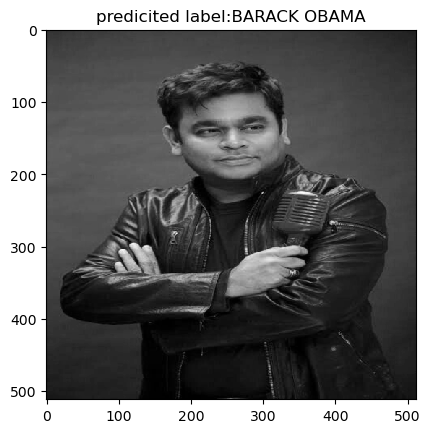

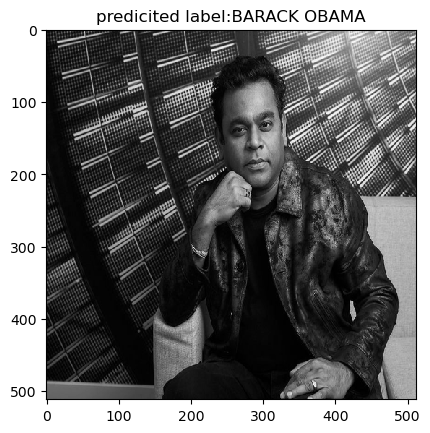

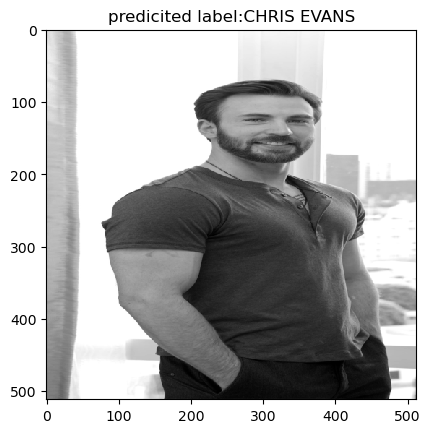

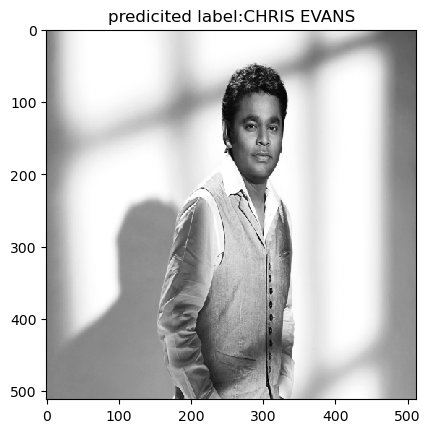

In [390]:
for i in (np.random.randint(0,6,4)):
    predicted_images = (np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicited label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [391]:
from sklearn import metrics

In [392]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [393]:
accuracy

0.625

In [394]:
from sklearn.metrics import confusion_matrix

In [395]:
confusion_matrix(y_test,y_pred)

array([[0, 2, 1],
       [0, 3, 0],
       [0, 0, 2]], dtype=int64)